In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
import seaborn as sns
sns.set_style('whitegrid')

0.9583423676262691
0.024240658440181227


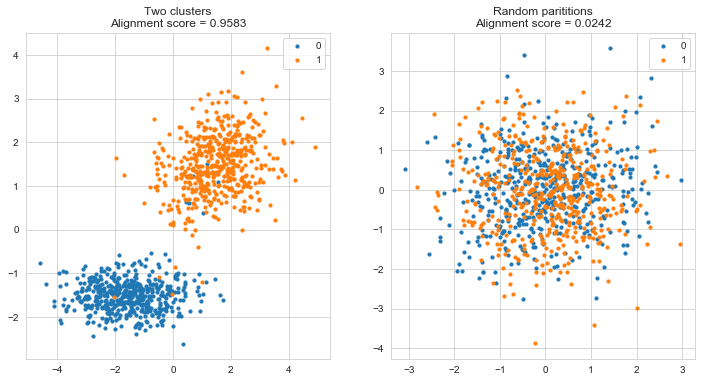

In [28]:
def alignment_score(X, y, K=10):
    N = X.shape[0]
    nn = NearestNeighbors(K)
    nn.fit(X)

    distances, indices = nn.kneighbors(X, K + 1)
    neighbor_classes = np.take(y, indices[:, 1:])
    same_class_fractions = np.sum(neighbor_classes == y[:, np.newaxis], axis=1)
    score = 1.0 - (np.mean(same_class_fractions) - K/N)/(K - K/N)
    return score

def knn_score(X, y, K=10):
    N = X.shape[0]
    assert K < N
    nn = NearestNeighbors(K)
    nn.fit(X)
    
    distances, indices = nn.kneighbors(X, K + 1)
    neighbor_classes = np.take(y, indices[:, 1:])
    same_class_fractions = np.sum(neighbor_classes == y[:, np.newaxis], axis=1)
    classes, counts = np.unique(y, return_counts=True)
    classes = np.argmax(y.reshape((-1, 1)) == classes.reshape((1, -1)), axis=1)
    counts = np.take(counts, classes)
    mean_r = K/(N - 1)*counts
    max_r = np.minimum(K, counts)
    scores = (same_class_fractions - mean_r)/(max_r - mean_r)
    #print(scores)
    return scores.mean()

X, y = make_classification(n_samples=1000, n_classes=2, n_features=2,
                           n_informative=2, n_redundant=0, class_sep=1.5, n_clusters_per_class=1)
X_rand = np.random.normal(size=(1000, 2))
y_rand = np.random.randint(2, size=1000)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for label in np.unique(y):
    axes[0].scatter(X[y == label, 0], X[y == label, 1], s=10, label=str(label))
axes[0].set_title('Two clusters\nAlignment score = {:.4f}'.format(knn_score(X, y, K=5)))
axes[0].legend()

for label in np.unique(y_rand):
    axes[1].scatter(X_rand[y_rand == label, 0], X_rand[y_rand == label, 1], s=10, label=str(label))
axes[1].set_title('Random parititions\nAlignment score = {:.4f}'.format(knn_score(X_rand, y_rand, K=5)))
axes[1].legend()


#print(alignment_score(X, y))
#print(alignment_score(X_rand, y_rand))
print(knn_score(X, y, K=5))
print(knn_score(X_rand, y_rand, K=5))